# 대표적인 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

# 평균
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 기댓값, 분산 반환
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

# 확률함수와 기댓값 그래프
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 베르누이 분포
- 확률변수가 취할 수 있는 값이 0,1 인 분포
- P(X) = P^x(1-P)^(1-x)
- E(X) = P
- V(X) = P(1-P)

In [3]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [4]:
p = 0.3
X = Bern(p)

In [5]:
check_prob(X)

expected value 0.3
variance 0.21


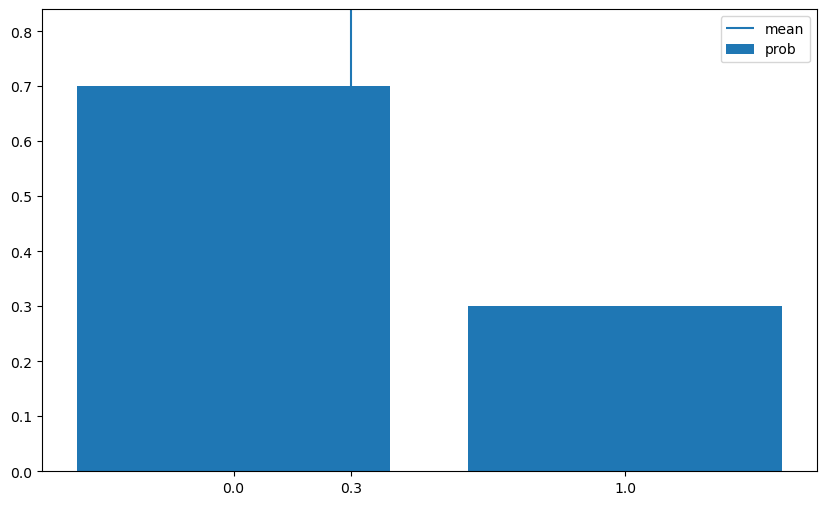

In [6]:
plot_prob(X)

## scipy.stats
- 확률변수 : stats.bernoulli(p)
- 확률질량함수 : pmf(0), pmf(1), pmf([0,1]) 
- 누적밀도함수 : cdf(0), cdf(1), cdf([0,1]) 
- 기댓값 : mean() 
- 분산 : var()

In [8]:
p

0.300

In [9]:
rv = stats.bernoulli(p)

In [10]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [11]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [12]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [16]:
rv.cdf(0)

0.7

In [15]:
rv.mean(), rv.var()

(0.3, 0.21)

## 이항분포
- 베르누이 시행을 N번 시행했을 때 성공 횟수가 따르는 분포
- X~Bin(n,p)
- E(X) = np
- Var(X) = np(1-p)

In [17]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [18]:
n = 10
p = 0.3
X = Bin(n, p)

In [19]:
check_prob(X)

expected value 3.0
variance 2.1


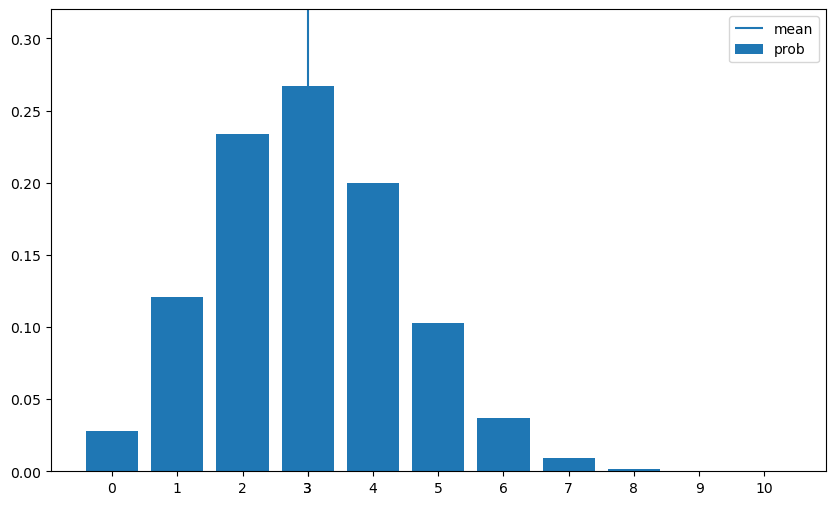

In [20]:
plot_prob(X)

## scipy.stats
- stats.binom(n,p)

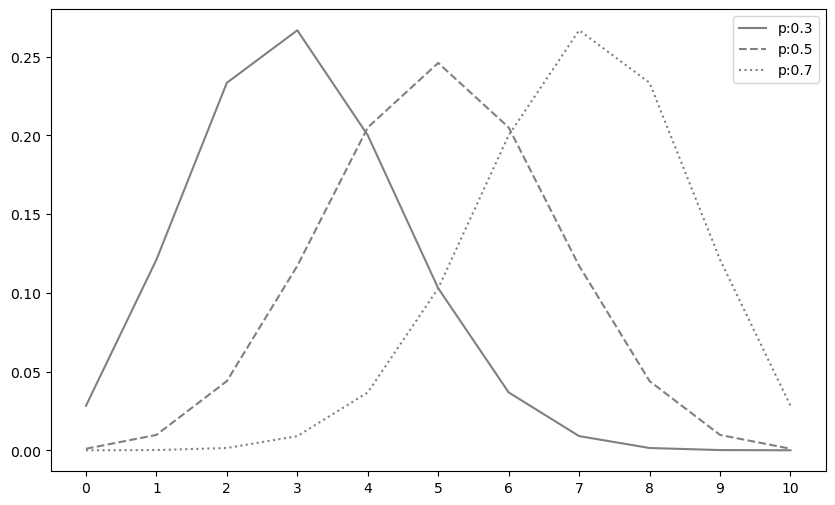

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 다르는 분포
- 확률변수 x값이 커질수록 확률값이 감소함
- X~Ge(p)
- E(X) = 1/p
- Var(X) = (1-p)/p^2

In [22]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [23]:
p = 0.5
X = Ge(p)

In [24]:
check_prob(X)

expected value 2.0
variance 2.0


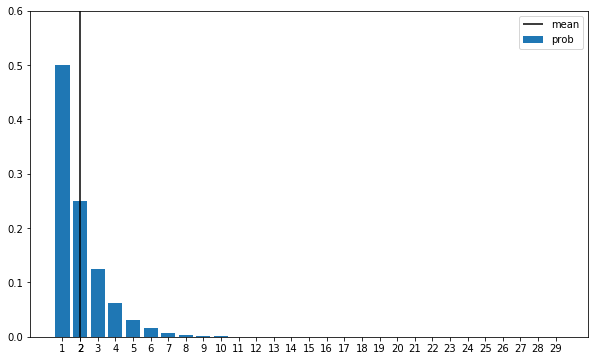

In [24]:
plot_prob(X)

# scipy.stats
- stats.geom(p)

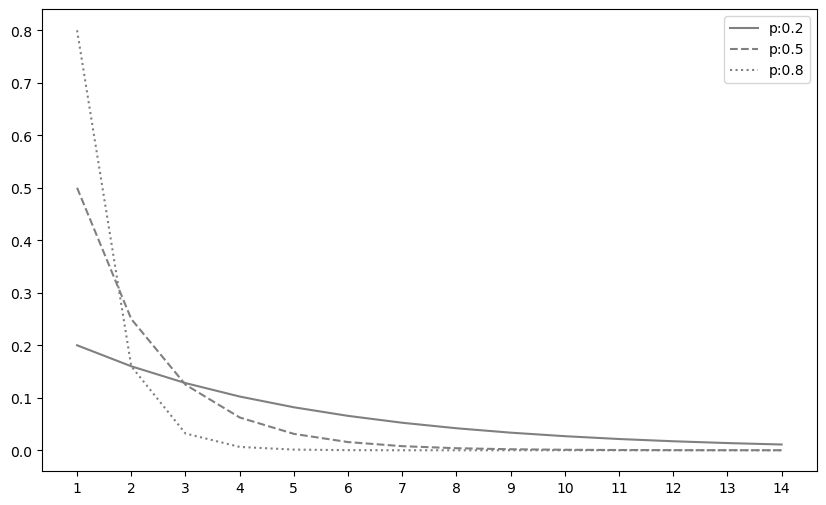

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 포아송 분포
- 단위시간이나 단위공간에서 어떤 사건의 출현횟수가 갖는 분포
- X~Poi(λ)
- E(X) = λ
- V(X) = λ

In [26]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [27]:
lam = 3
X = Poi(lam)

In [28]:
check_prob(X)

expected value 3.0
variance 3.0


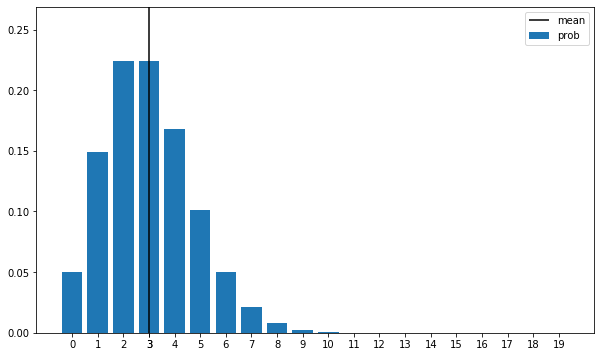

In [29]:
plot_prob(X)

# scipy.stats
- stats.poisson(λ)

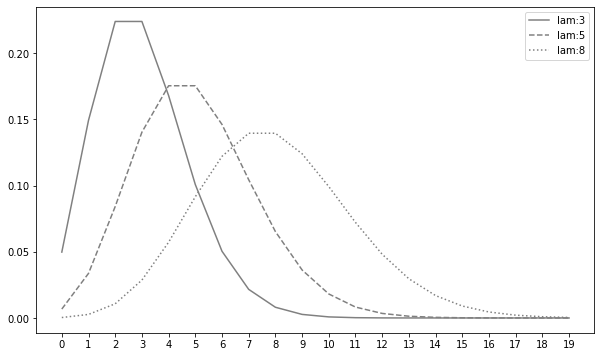

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()